# p+ 固定方向和能量

- ../../data/gen/single_p+_fixed_enery_and_direction/\*/\*.root
- 对比加入不同厚度液氢和油(C18H38)对能量、角度重建的影响

In [1]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

from single_pp_fixed_enery_and_direction_func import root2Df

## 1. 读入数据、拟合

In [2]:
def getSummary(root_path, kal=False):
    df_list = []
    index = []
    for d in os.listdir(root_path):
        index.append(float(d.split('_')[-1]))
        try:
            root_files = glob(os.path.join(root_path, d, '*.root'))       
            df_list.append(root2Df(root_files, kal=kal))
        except Exception as e:
            print(e)
            df_list.append(pd.Series([np.nan]*5))

    df = pd.concat(df_list, axis=1).T
    df.index = index
    df.columns = ['p_loc', 'p_scale', 'theta_loc', 'theta_scale', 'between_3_sigma']
    df = df.sort_index()

    return df
    

### 1.1 液氢

In [3]:
root_path = os.path.join(this_path, '../../data/gen/single_p+_fixed_enery_and_direction/add_lh')

df_lh = getSummary(root_path, kal=False)
df_lh_kal = getSummary(root_path, kal=True)

z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_lh\lh_20.0\0.root
[[0.259], [0.257], [0.253], [0.256], ... 0.259], [0.253], [], [0.256], [0.252]]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 9396.63] [loc=0.257 scale=0.003]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 134.953] [loc=1.471 scale=0.022]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_lh\lh_0.0\0.root
[[0.28], [0.276], [0.274], [0.273], ... [0.272], [0.276], [0.272], [0.268]]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 5882.55] [loc=0.275 scale=0.004]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 135.181] [loc=1.470 scale=0.022]
[distfit]

In [4]:
df_lh

,p_loc,p_scale,theta_loc,theta_scale,between_3_sigma
0.0,0.274565,0.003610,1.469993,0.021937,974.0
5.0,0.270645,0.002953,1.471648,0.021518,969.0
10.0,0.265964,0.003023,1.472058,0.022963,970.0
15.0,0.261583,0.003109,1.470496,0.021598,961.0
20.0,0.256631,0.002865,1.470904,0.022160,967.0


In [5]:
df_lh_kal

,p_loc,p_scale,theta_loc,theta_scale,between_3_sigma
0.0,0.274462,0.008392,1.469164,0.021963,974.0
5.0,0.270734,0.004220,1.470315,0.021784,969.0
10.0,0.266087,0.003830,1.470927,0.023341,970.0
15.0,0.261865,0.004577,1.469669,0.021003,961.0
20.0,0.256954,0.004072,1.470059,0.022752,967.0


### 1.2 油

In [6]:
root_path = os.path.join(this_path, '../../data/gen/single_p+_fixed_enery_and_direction/add_oil')

df_oil = getSummary(root_path, kal=False)
df_oil_kal = getSummary(root_path, kal=True)

z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_oil\lh_20.0\0.root
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
[distfit] >fit..
[distfit] >Error: Input X is empty!
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_oil\lh_0.0\0.root
[[0.28], [0.276], [0.274], [0.273], ... [0.272], [0.276], [0.272], [0.268]]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 5882.55] [loc=0.275 scale=0.004]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 135.181] [loc=1.470 scale=0.022]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_oil\lh_15.0\0.root
[[0.133], [0.129], [0.125], [0.109], [], ... [0.117], [], [0.118], [0.129], []]
[distfit] >f

In [7]:
df_oil

,p_loc,p_scale,theta_loc,theta_scale,between_3_sigma
0.0,0.274565,0.003610,1.469993,0.021937,974.0
5.0,0.247518,0.003312,1.471160,0.032212,947.0
10.0,0.208372,0.004319,1.468980,0.042690,952.0
15.0,0.129122,0.014024,1.439523,0.159151,842.0
20.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df_oil_kal

,p_loc,p_scale,theta_loc,theta_scale,between_3_sigma
0.0,0.274462,0.008392,1.469164,0.021963,974.0
5.0,0.248074,0.005145,1.471142,0.033026,947.0
10.0,0.208729,0.006980,1.470052,0.042140,952.0
15.0,0.131928,0.016878,1.443820,0.170761,842.0
20.0,NaN,NaN,NaN,NaN,NaN


### 1.3 CsI

In [12]:
root_path = os.path.join(this_path, '../../data/gen/single_p+_fixed_enery_and_direction/add_csi')

df_csi = getSummary(root_path, kal=False)
df_csi_kal = getSummary(root_path, kal=True)

z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_csi\lh_20.0\0.root
not found: 'RecInfo' (with any cycle number)

    Available keys: (none!)

in file z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_csi\lh_20.0\0.root
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_csi\lh_0.0\0.root
[[0.28], [0.276], [0.274], [0.273], ... [0.272], [0.276], [0.272], [0.268]]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 5882.55] [loc=0.275 scale=0.004]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 135.181] [loc=1.470 scale=0.022]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+_fixed_enery_and_direction/add_csi\lh_15.0\0.root
not found: 'RecInfo' (

## 2. 可视化

### 2.1 使用MDC track

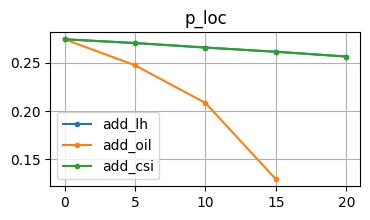

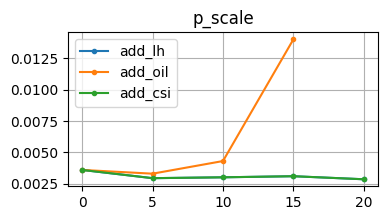

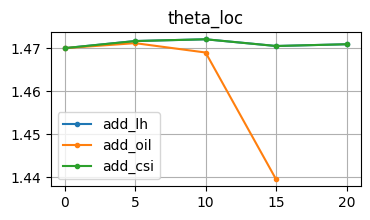

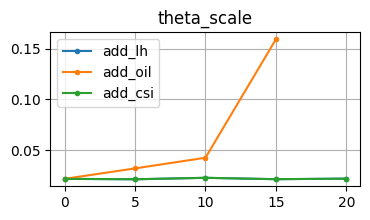

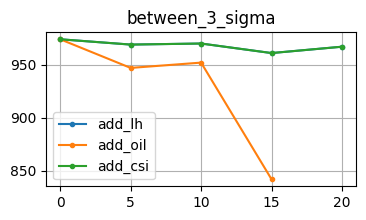

In [10]:
for column in df_lh.columns:
    tmp = pd.DataFrame({
        'add_lh': df_lh[column], 
        'add_oil': df_oil[column], 
        'add_csi': df_csi[column], 
    })
    tmp.plot(title=column, grid=True, figsize=(4,2), style='.-')
    plt.show()

### 2.2 使用kalman track

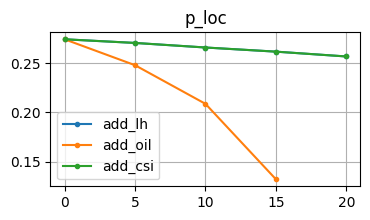

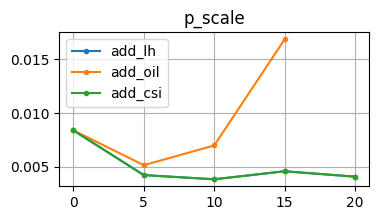

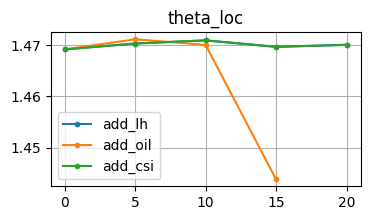

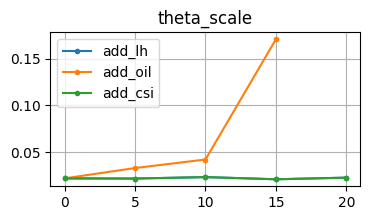

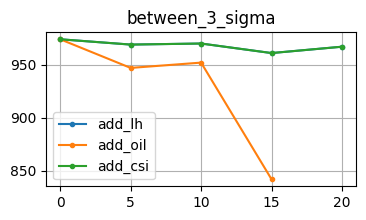

In [11]:
for column in df_lh_kal.columns:
    tmp = pd.DataFrame({
        'add_lh': df_lh_kal[column], 
        'add_oil': df_oil_kal[column], 
        'add_csi': df_csi_kal[column], 
    })
    tmp.plot(title=column, grid=True, figsize=(4,2), style='.-')
    plt.show()